# Numpy, Matplotlib and Sklearn Tutorial

We often use numpy to handle high dimensional arrays.

Let's try the basic operation of numpy:

In [ ]:
import numpy as np

a = np.array([[1,2,3], [2,3,4]])
print(a.ndim, a.shape, a.size, a.dtype, type(a))

b = np.zeros((3,4))
c = np.ones((3,4))
d = np.random.randn(2,3)
e = np.array([[1,2], [2,3], [3,4]])
f = b*2 - c*3
g = 2*c*f
h = np.dot(a,e)
i = d.mean()
j = d.max(axis=1)
k = a[-1][:2]

# You can print a to k for details

2 (2, 3) 6 int32 <class 'numpy.ndarray'>

matplotlib.pyplot provides very useful apis for drawing graphs.

Let's try the basic operation of matplotlib.pyplot:

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(2, 10, 0.2)

plt.plot(x, x**1.5*.5, 'r-', x, np.log(x)*5, 'g--', x, x, 'b.')
plt.show()

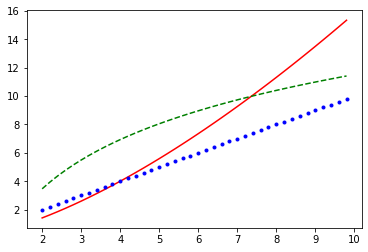

If you want to print them in different graphs, try this:

In [ ]:
def f(x):
    return np.sin(np.pi*x)

x1 = np.arange(0, 5, 0.1)
x2 = np.arange(0, 5, 0.01)

plt.subplot(211)
plt.plot(x1, f(x1), 'go', x2, f(x2-1))

plt.subplot(212)
plt.plot(x2, f(x2), 'r--')
plt.show()

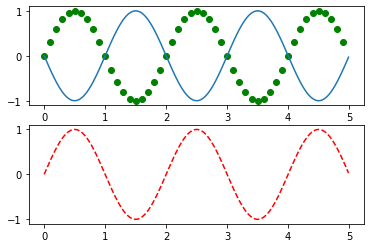

How about printing images?

Let's try to print a image whose pixels gradually change:

Different pixel values represent different gray levels.

In [ ]:
img = np.arange(0, 1, 1/32/32) # define an 1D array with 32x32 elements gradually increasing
img = img.reshape(32, 32) # reshape it into 32x32 array, the array represents a 32x32 image,
                          # each element represents the corresponding pixel of the image
plt.imshow(img, cmap='gray')
plt.show()

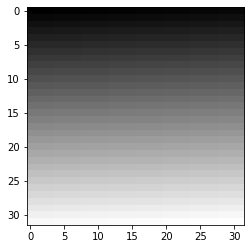

Based on numpy, Scikit-learn (sklearn) provides a lot of tools for machine learning.It is a very powerful machine learning library.

Then, let's use it for mnist classification:

In [ ]:
from sklearn.datasets import fetch_mldata

# download and read mnist
mnist = fetch_mldata('MNIST original', data_home='./')

# 'mnist.data' is 70k x 784 array, each row represents the pixels from a 28x28=784 image
# 'mnist.target' is 70k x 1 array, each row represents the target class of the corresponding image
images = mnist.data
targets = mnist.target

# make the value of pixels from [0, 255] to [0, 1] for further process
X = mnist.data / 255.
Y = mnist.target

# print the first image of the dataset
img1 = X[0].reshape(28, 28)
plt.imshow(img1, cmap='gray')
plt.show()

# print the images after simple transformation
img2 = 1 - img1
plt.imshow(img2, cmap='gray')
plt.show()

img3 = img1.transpose()
plt.imshow(img3, cmap='gray')
plt.show()

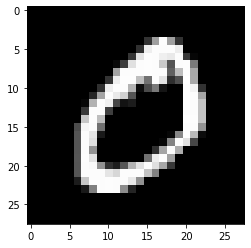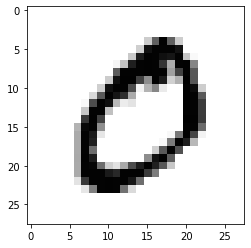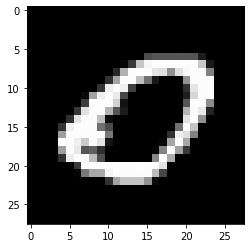

In [ ]:
# split data to train and test (for faster calculation, just use 1/10 data)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X[::10], Y[::10], test_size=1000)

#### Q1:
Please use the logistic regression(default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [ ]:
# TODO:use logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# download and read mnist
mnist = fetch_mldata('MNIST original', data_home='./')

# 'mnist.data' is 70k x 784 array, each row represents the pixels from a 28x28=784 image
# 'mnist.target' is 70k x 1 array, each row represents the target class of the corresponding image
images = mnist.data
targets = mnist.target

X = mnist.data / 255.
Y = mnist.target

X_train = X[:60000]
X_test = X[60000:70000]
Y_train = Y[:60000]
Y_test = Y[60000:70000]

roc_logistcis = 0
clf = LogisticRegression()
clf.fit(X_train,Y_train)
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)


sum_train= 0.0
sum_test = 0.0
for i in range(60000):
    if(Y_train_pred[i] == Y_train[i]):
        sum_train = sum_train+1
for i in range(10000):
    if(Y_test_pred[i] == Y_test[i]):
        sum_test = sum_test+1
    
print('Training accuracy: %0.2f%%' % (sum_train*100/60000))
print('Testing accuracy: %0.2f%%' % (sum_test*100/10000))

#### Q2:
Please use the naive bayes(Bernoulli, default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [ ]:
# TODO:use naive bayes
from sklearn.naive_bayes import BernoulliNB

# download and read mnist
mnist = fetch_mldata('MNIST original', data_home='./')

# 'mnist.data' is 70k x 784 array, each row represents the pixels from a 28x28=784 image
# 'mnist.target' is 70k x 1 array, each row represents the target class of the corresponding image
images = mnist.data
targets = mnist.target

X = mnist.data / 255.
Y = mnist.target

X_train = X[:60000]
X_test = X[60000:70000]
Y_train = Y[:60000]
Y_test = Y[60000:70000]


clf = BernoulliNB()
clf.fit(X_train,Y_train)
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)


sum_train= 0.0
sum_test = 0.0
for i in range(60000):
    if(Y_train_pred[i] == Y_train[i]):
        sum_train = sum_train+1
for i in range(10000):
    if(Y_test_pred[i] == Y_test[i]):
        sum_test = sum_test+1
    
print('Training accuracy: %0.2f%%' % (sum_train*100/60000))
print('Testing accuracy: %0.2f%%' % (sum_test*100/10000))

#### Q3:
Please use the support vector machine(default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [ ]:
# TODO:use support vector machine
from sklearn.svm import LinearSVC

# download and read mnist
mnist = fetch_mldata('MNIST original', data_home='./')

# 'mnist.data' is 70k x 784 array, each row represents the pixels from a 28x28=784 image
# 'mnist.target' is 70k x 1 array, each row represents the target class of the corresponding image
images = mnist.data
targets = mnist.target

X = mnist.data / 255.
Y = mnist.target

X_train = X[:60000]
X_test = X[60000:70000]
Y_train = Y[:60000]
Y_test = Y[60000:70000]


clf = LinearSVC()
clf.fit(X_train,Y_train)
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)


sum_train= 0.0
sum_test = 0.0
for i in range(60000):
    if(Y_train_pred[i] == Y_train[i]):
        sum_train = sum_train+1
for i in range(10000):
    if(Y_test_pred[i] == Y_test[i]):
        sum_test = sum_test+1
    
print('Training accuracy: %0.2f%%' % (sum_train*100/60000))
print('Testing accuracy: %0.2f%%' % (sum_test*100/10000))

#### Q4:
Please adjust the parameters of SVM to increase the testing accuracy, and print the training accuracy and test accuracy.

In [ ]:
# TODO:use SVM with another group of parameters

# download and read mnist
mnist = fetch_mldata('MNIST original', data_home='./')

# 'mnist.data' is 70k x 784 array, each row represents the pixels from a 28x28=784 image
# 'mnist.target' is 70k x 1 array, each row represents the target class of the corresponding image
images = mnist.data
targets = mnist.target

X = mnist.data / 255.
Y = mnist.target

X_train = X[:60000]
X_test = X[60000:70000]
Y_train = Y[:60000]
Y_test = Y[60000:70000]

model = svm.SVC(kernel = 'rbf',class_weight='balanced',gamma=0.01)
model.fit(X_train,Y_train)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

sum_train= 0.0
sum_test = 0.0
for i in range(60000):
    if(Y_train_pred[i] == Y_train[i]):
        sum_train = sum_train+1
for i in range(10000):
   if(Y_test_pred[i] == Y_test[i]):
        sum_test = sum_test+1
    
print('Training accuracy: %0.2f%%' % (sum_train*100/60000))
print('Testing accuracy: %0.2f%%' % (sum_test*100/10000))
